In [193]:
from matplotlib import pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import loadDataFRP, places, geo_tools

%matplotlib inline

In [6]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid()

(40, 898, 398) 415 337 1.0
(40, 898, 398) 415 337 2.0
(40, 898, 398)

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:3883: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


 442 259 3.0
(40, 898, 398) 438 268 4.0
(40, 898, 398) 434 278 5.0
(40, 898, 398) 432 281 6.0
(40, 898, 398) 430 285 7.0
(40, 898, 398) 428 289 8.0
(40, 898, 398) 427 291 9.0
(40, 898, 398) 412 291 10.0
(40, 898, 398) 443 258 11.0
(40, 898, 398) 438 268 12.0
(40, 898, 398) 434 278 13.0
(40, 898, 398) 432 281 14.1
(40, 898, 398) 432 281 14.2
(40, 898, 398) 432 287 15.0
(40, 898, 398) 432 292 16.0
(40, 898, 398) 427 291 17.0
(40, 898, 398) 415 337 18.0


In [10]:
stationdata.drop(stationdata.index[9:], inplace=True)
stationdata

,Station,Date,Date_UTC,Time_UTC_hhmmss,Time_UTC_DecDay,LatDecDeg,LonDecDeg,LatDecDeg_surface,LonDecDeg_surface,LatDecDeg_bottom,...,SecchiDepth_m,BottleLetter,ALS_Turb_NTU,ALS_TSS_mgL,sb19Turb_uncorrected,sb19Sal,sb25Sal,ishift_sub19,pStart25,pEnd25
0,1.0,20170410,20170410,17:54:17,0.746030,49.148333,-123.040000,NaN,NaN,NaN,...,0.6,NaN,NaN,NaN,770.1800,0.06790,0.10165,-2,769,1103
1,2.0,20170410,20170410,18:05:11,0.753600,49.148333,-123.040000,NaN,NaN,NaN,...,0.6,A,25.40,32.5,745.4985,0.12265,0.06790,2,740,1060
2,3.0,20170410,20170410,19:44:22,0.822477,49.099983,-123.526600,NaN,NaN,NaN,...,3.0,B,2.40,8.9,54.0550,25.84535,25.84735,9,599,1939
3,4.0,20170410,20170410,20:25:40,0.851157,49.100383,-123.467017,NaN,NaN,NaN,...,3.0,C,2.54,12.2,66.1860,25.49475,25.49710,3,683,1832
4,5.0,20170410,20170410,21:05:12,0.878611,49.100583,-123.400417,NaN,NaN,NaN,...,1.5,D,8.28,18.9,264.7250,16.30680,16.43395,5,598,1820
5,6.0,20170410,20170410,21:40:15,0.902951,49.100500,-123.375500,NaN,NaN,NaN,...,1.3,NaN,NaN,NaN,270.8475,15.78590,15.99810,5,581,1764
6,7.0,20170410,20170410,21:58:48,0.915833,49.100000,-123.350000,NaN,NaN,49.112500,...,1.2,E,8.60,15.7,245.6130,19.20975,19.81565,9,590,1785
7,8.0,20170410,20170410,22:30:56,0.938148,49.100333,-123.324667,NaN,NaN,49.103833,...,1.0,NaN,NaN,NaN,255.7415,16.88105,17.44155,9,1120,2250
8,9.0,20170410,20170410,22:45:20,0.948148,49.101500,-123.309000,NaN,NaN,49.102833,...,0.8,F,9.36,21.8,308.4425,13.52375,13.79160,9,635,859


In [33]:
mydata=stationdata.drop(['Date_UTC', 'Time_UTC_DecDay', 'LatDecDeg_surface', 
                         'LonDecDeg_surface', 'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
                        'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin', 'LatDecDeg_end',
                        'LonDecDeg_end', 'MaxWireOut_m', 'waveHeightEst_m', 'cloudyPct',
                        'filename', 'time_PDT_hhmmss', 'time_PDT_decDay', 'time_on_PDT_hhmmss',
                        'time_on_PDT_decDay', 'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
                        'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay', 'time_surf2_PDT_hhmmss',
                        'time_Niskin_PDT_hhmmss', 'time_off_PDT_hhmmss', 'SecchiDepth_m',
                        'BottleLetter', 'ALS_Turb_NTU', 'ALS_TSS_mgL', 'sb19Turb_uncorrected',
                        'sb19Sal', 'sb25Sal', 'ishift_sub19', 'pStart25', 'pEnd25'], axis=1)
mydata

,Station,Date,Time_UTC_hhmmss,LatDecDeg,LonDecDeg,Sounding
0,1.0,20170410,17:54:17,49.148333,-123.040000,16.0
1,2.0,20170410,18:05:11,49.148333,-123.040000,15.5
2,3.0,20170410,19:44:22,49.099983,-123.526600,316.0
3,4.0,20170410,20:25:40,49.100383,-123.467017,333.0
4,5.0,20170410,21:05:12,49.100583,-123.400417,243.0
5,6.0,20170410,21:40:15,49.100500,-123.375500,202.0
6,7.0,20170410,21:58:48,49.100000,-123.350000,156.0
7,8.0,20170410,22:30:56,49.100333,-123.324667,96.0
8,9.0,20170410,22:45:20,49.101500,-123.309000,13.0


In [39]:
river_mouth = {}
river_mouth['lon'], river_mouth['lat'] = places.PLACES['Sandheads']['lon lat']

In [43]:
mydata['distance_from_mouth'] = geo_tools.haversine(mydata['LonDecDeg'], mydata['LatDecDeg'], 
                                                    river_mouth['lon'], river_mouth['lat'])
mydata

,Station,Date,Time_UTC_hhmmss,LatDecDeg,LonDecDeg,Sounding,distance_from_mouth
0,1.0,20170410,17:54:17,49.148333,-123.040000,16.0,19.655955
1,2.0,20170410,18:05:11,49.148333,-123.040000,15.5,19.655955
2,3.0,20170410,19:44:22,49.099983,-123.526600,316.0,16.486993
3,4.0,20170410,20:25:40,49.100383,-123.467017,333.0,12.151849
4,5.0,20170410,21:05:12,49.100583,-123.400417,243.0,7.306375
5,6.0,20170410,21:40:15,49.100500,-123.375500,202.0,5.493493
6,7.0,20170410,21:58:48,49.100000,-123.350000,156.0,3.637907
7,8.0,20170410,22:30:56,49.100333,-123.324667,96.0,1.795077
8,9.0,20170410,22:45:20,49.101500,-123.309000,13.0,0.675696


In [211]:
mydata['timepiece'] = [18, 18, 20, 20, 21, 22, 22, 23, 23]

In [201]:
with nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc') as bathyds:
    model_lons, model_lats = bathyds['nav_lon'][:], bathyds['nav_lat'][:]

(898, 398)


In [208]:
mydata['x'] = np.zeros((9))
mydata['y'] = np.zeros((9))
for n in range(9):
    mydata.x.iloc[n], mydata.y.iloc[n] = geo_tools.find_closest_model_point(mydata['LonDecDeg'][n], mydata['LatDecDeg'][n],
                                                             model_lons, model_lats)
print(mydata.x.iloc[5])

0.0


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


432.0


In [113]:
salinities = np.empty((9, 26))
depths = np.empty((9, 26))
salinities[:] = np.NAN
depths[:] = np.NAN

In [101]:
n = 3
station = stationdata.iloc[n]
cast = casts[station['Station']].dCast
cast

,depth_m,indk,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,0.500000,0,NaN,NaN,NaN,3.696123e+02,NaN,NaN,1.999826
1,1.500003,1,8.854292,25.578106,64.360508,2.153176e+02,13.112614,7.337838,2.054996
2,2.500011,2,8.768968,26.267741,68.323950,1.148769e+02,14.668691,6.901566,1.742632
3,3.500031,3,8.502463,27.683875,77.272761,7.100680e+01,11.366840,6.568123,1.233757
4,4.500071,4,8.437528,27.971358,83.312115,4.772259e+01,9.814813,6.475180,0.917036
5,5.500151,5,8.447946,28.136516,85.193878,3.361860e+01,8.867536,6.411832,0.799074
6,6.500310,6,8.471705,28.201405,85.793854,2.414218e+01,7.294544,6.366440,0.818419
7,7.500623,7,8.465294,28.246961,85.846768,1.738321e+01,7.194613,6.328358,0.764521
8,8.501236,8,8.462865,28.331292,85.534252,1.292721e+01,7.159151,6.361246,0.772199
9,9.502433,9,8.449480,28.562045,84.587486,9.354783e+00,8.752444,6.399064,0.805961


In [280]:
for n in range(9):
    station = stationdata.iloc[n]
    cast = casts[station['Station']].dCast
    salinities[n, :cast.shape[0]] = cast['gsw_srA0']
    depths[n, :cast.shape[0]] = cast['depth_m']
    salinities[n, 0] = 1.1*salinities[n, 1] - 0.1*salinities[n, 2]

In [281]:
dsalinity = salinities[:, 1:] - salinities[:, 0:-1]
halocline = np.nanargmax(dsalinity, axis=1)
print(halocline[2:])

[3 2 1 1 5 1 1]


(16, 0)

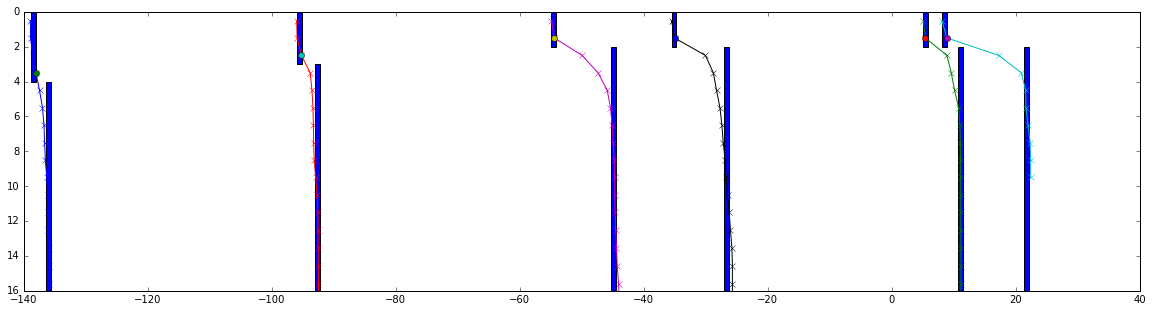

In [317]:
lower = np.zeros((9))
upper = np.zeros((9))
dist = 10
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
for n in [2, 3, 4, 5, 7, 8]:
    ax.plot(salinities[n] - dist*mydata.distance_from_mouth[n], depths[n], '-x');
    ax.plot(salinities[n, halocline[n]]- dist*mydata.distance_from_mouth[n], 
            depths[n, halocline[n]], 'o')
    upper[n] = np.mean(salinities[n, 0:halocline[n]])
    lower[n] = np.nanmean(salinities[n, halocline[n]+1:16])
    ax.bar(upper[n]- dist*mydata.distance_from_mouth[n], halocline[n]+1 )
    ax.bar(lower[n]- dist*mydata.distance_from_mouth[n], 16-halocline[n], 0.8, halocline[n]+1)
ax.invert_yaxis()
ax.set_ylim(16, 0)

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


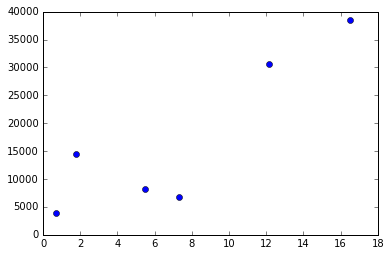

In [284]:
R = 2.231440e+03*1.6
entrain = upper/lower*R/(1-upper/lower)
plt.plot(mydata.distance_from_mouth, entrain, 'o')

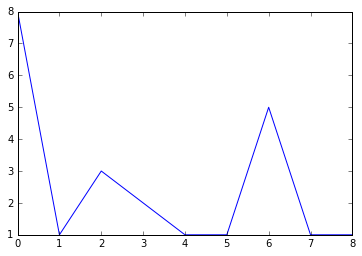

In [285]:
plt.plot(halocline)

In [302]:
#thedata = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
thedata = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa_2/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
deptht = thedata['deptht'][:]

In [303]:
model_profile = np.zeros((9, 16))
for n in range(9):
    model_profile[n] = thedata['vosaline'][mydata['timepiece'][n], 0:16, mydata['x'][n], mydata['y'][n]]
model_profile[8, 13:] = np.nan

In [304]:
dmsalinity = model_profile[:, 1:] - model_profile[:, 0:-1]
mhalocline = np.nanargmax(dmsalinity, axis=1)
print(mhalocline)

[ 5  5 14 12  1  2  2  2  1]


(16, 0)

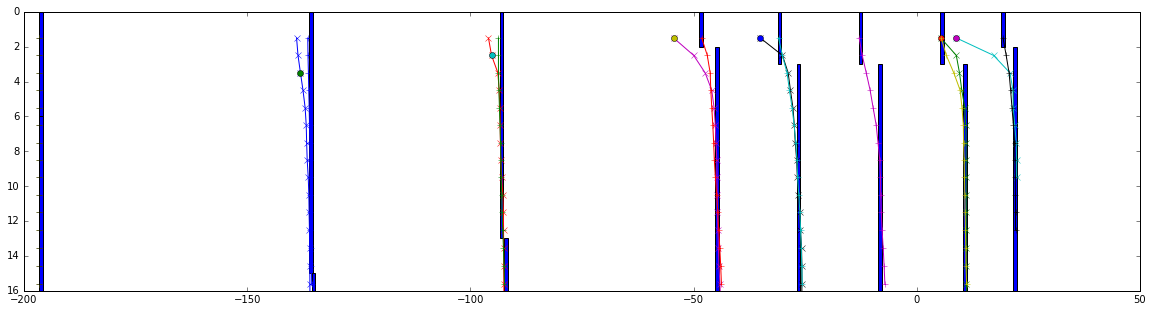

In [319]:
dist = 10
err = 0
mlower = np.zeros((9))
mupper = np.zeros((9))
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
for n in [2, 3, 4, 5, 7, 8]:
    ax.plot(salinities[n, 1:] - dist*mydata.distance_from_mouth[n], depths[n, 1:], '-x');
    ax.plot(salinities[n, halocline[n]]- dist*mydata.distance_from_mouth[n], 
            depths[n, halocline[n]], 'o')
for n in range(9):
    ax.plot(model_profile[n, 1:] - (dist+err)*mydata.distance_from_mouth[n], deptht[1:16], '-+')
    mupper[n] = np.mean(model_profile[n, 0:mhalocline[n]])
    mlower[n] = np.nanmean(model_profile[n, mhalocline[n]+1:16])
    ax.bar(mupper[n]- dist*mydata.distance_from_mouth[n], mhalocline[n]+1 )
    ax.bar(mlower[n]- dist*mydata.distance_from_mouth[n], 16-mhalocline[n], 0.8, mhalocline[n]+1)
ax.invert_yaxis()
ax.set_ylim(16, 0)
#ax.set_xlim(15, 30)

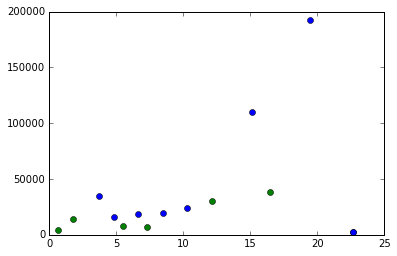

In [316]:
mentrain = mupper/mlower*R/(1-mupper/mlower)
plt.plot(mydata.distance_from_mouth+err, mentrain, 'o')
plt.plot(mydata.distance_from_mouth, entrain, 'o')

(13, 30)

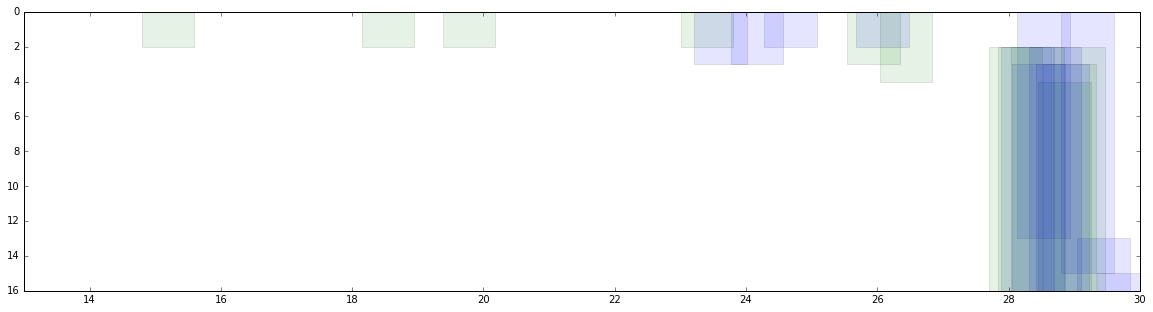

In [307]:
dist = 0
err = 0
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
for n in [2, 3, 4, 5, 7, 8]:
    ax.bar(upper[n]- dist*mydata.distance_from_mouth[n], halocline[n]+1, color='g', alpha=0.1 )
    ax.bar(lower[n]- dist*mydata.distance_from_mouth[n], 16-halocline[n], 0.8, halocline[n]+1, color='g', alpha=0.1)
    ax.bar(mupper[n]- dist*mydata.distance_from_mouth[n], mhalocline[n]+1, color='b' , alpha=0.1)
    ax.bar(mlower[n]- dist*mydata.distance_from_mouth[n], 16-mhalocline[n], 0.8, mhalocline[n]+1, color='b', alpha=0.1)
ax.invert_yaxis()
ax.set_ylim(16, 0)
ax.set_xlim(13, 30)

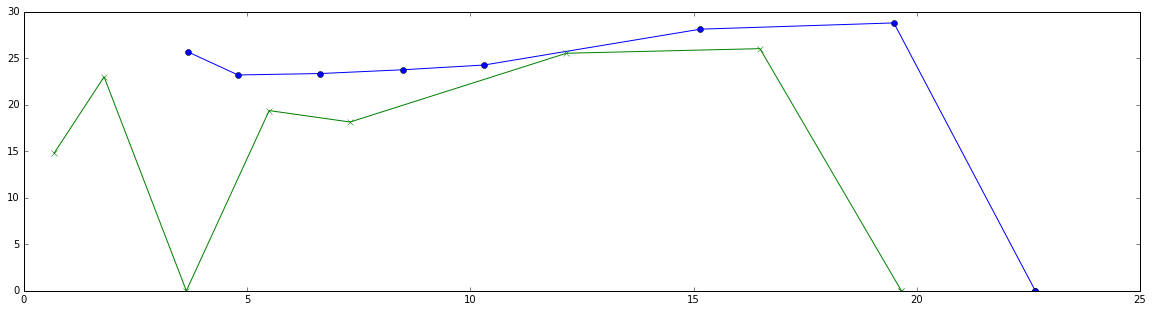

In [314]:
err=3
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(mydata.distance_from_mouth+err, mupper, 'o-')
ax.plot(mydata.distance_from_mouth, upper, 'x-')

(25, 30)

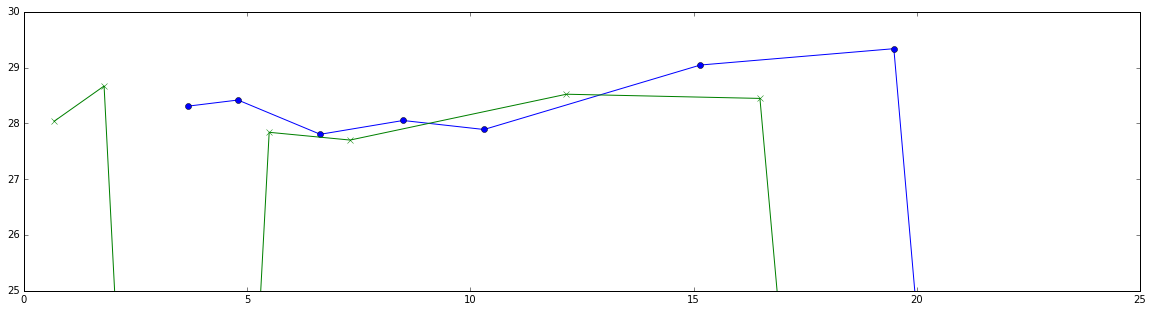

In [315]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(mydata.distance_from_mouth+err, mlower, 'o-')
ax.plot(mydata.distance_from_mouth, lower, 'x-')
ax.set_ylim(25, 30)

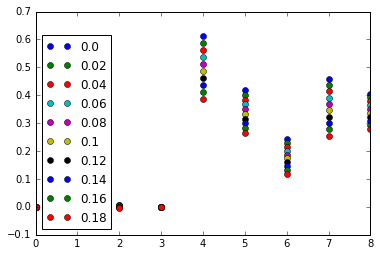

In [309]:
for fixer in np.arange(0, 0.2, 0.02):
    plt.plot((1+fixer)*model_profile[:,1]-fixer*model_profile[:,2]-model_profile[:, 0], 'o', label=fixer)
plt.legend(loc='lower left')